### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [1]:
%matplotlib inline
!pip install mglearn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 15}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 10.0

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data',
                header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df[60].dtype

dtype('O')

In [4]:
df[df.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60


In [5]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [6]:
repl_MR = {60: {'M': 0, 'R': 1}}

In [7]:
df.replace(repl_MR, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [8]:
df[60].dtype

dtype('int64')

In [9]:
# features and label

X = df.iloc[:,:60]
y = df[60]

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.85
Best parameters: {'C': 10, 'gamma': 1}
Best cross-validation score: 0.87

Best estimator:
SVC(C=10, gamma=1)


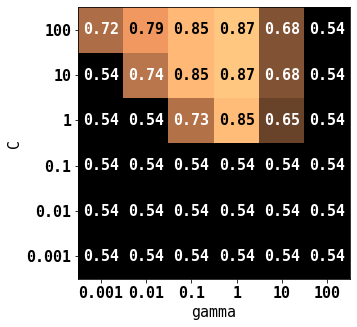

In [11]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap='copper')

Best set of parameters: gamma=1, C=10 (C=100)

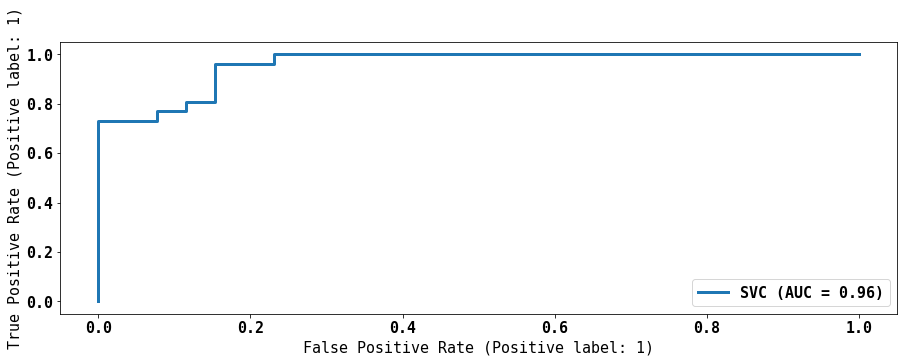

In [12]:
from sklearn.metrics import plot_roc_curve
from sklearn import metrics
clf = SVC(C=10, gamma=1).fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()                                   

ROC curve shows that the perfect classifier (0,1) hasn't been reached in our case, however, the model as such is good enough to be used for prediction: the line is close to the upper-left corner - as well as AUC score = 0.96, which is considered as excellent one.

#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

In [13]:
!pip install xlrd
import xlrd

data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls', 'Data', header=1)

In [14]:
data.dtypes

b              float64
e              float64
AC             float64
FM             float64
UC             float64
DL             float64
DS             float64
DP             float64
DR             float64
Unnamed: 9     float64
LB             float64
AC.1           float64
FM.1           float64
UC.1           float64
DL.1           float64
DS.1           float64
DP.1           float64
ASTV           float64
MSTV           float64
ALTV           float64
MLTV           float64
Width          float64
Min            float64
Max            float64
Nmax           float64
Nzeros         float64
Mode           float64
Mean           float64
Median         float64
Variance       float64
Tendency       float64
Unnamed: 31    float64
A              float64
B              float64
C              float64
D              float64
E              float64
AD             float64
DE             float64
LD             float64
FS             float64
SUSP           float64
Unnamed: 42    float64
CLASS      

In [15]:
data.drop(columns=['Unnamed: 9', 'Unnamed: 31', 'Unnamed: 42', 'Unnamed: 44'], inplace=True)
data

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,142.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,53.0,81.0,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN


In [16]:
#drop NaN values
data = data.dropna()
data

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2059.0,2867.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2122,1576.0,2867.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,140.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,2.0


In [17]:
data['CLASS'].unique()

array([ 9.,  6.,  2.,  8., 10.,  7.,  1.,  3.,  5.,  4.])

In [18]:
data['NSP'].unique()

array([2., 1., 3.])

In [19]:
#define features and targets

X = data.iloc[:,9:30].values
y_cl = data['CLASS'].values
y_nsp = data['NSP'].values

#train/test split

X_train, X_test, y_cl_train, y_cl_test = train_test_split(X, y_cl, random_state=0)
X_train, X_test, y_nsp_train, y_nsp_test = train_test_split(X, y_nsp, random_state=0)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from time import time

I will run GridSearchCV and RandomSearchCV algorithms using RandomForestClassifier as classification model to find the best parameters for CLASS and NSP prediction.

In [21]:
#GridSearchCV for CLASS-target

#create pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("forest", RandomForestClassifier())])

param_grid = {'forest__n_estimators': [10, 20, 50, 100, 150],
              'forest__min_samples_split': [2, 5, 8, 10],
              'forest__min_samples_leaf': [1, 2, 3]}

#run grid search
grid = GridSearchCV(pipe, param_grid=param_grid)

start = time()

grid.fit(X_train, y_cl_train)

print("GridSearchCV took %.2f seconds:"
      % (time() - start))
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_cl_test)))
print("Best parameters: {}".format(grid.best_params_))

GridSearchCV took 127.89 seconds:
Best cross-validation accuracy: 0.87
Test set score: 0.88
Best parameters: {'forest__min_samples_leaf': 1, 'forest__min_samples_split': 2, 'forest__n_estimators': 150}


In [22]:
#RandomizedSearchCV for CLASS-target

n_iter_search = 20
random_search = RandomizedSearchCV(pipe, param_distributions=param_grid,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_cl_train)

print("RandomizedSearchCV took %.2f seconds:"
      % (time() - start))
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))
print("Test set score: {:.2f}".format(random_search.score(X_test, y_cl_test)))
print("Best parameters: {}".format(random_search.best_params_))

RandomizedSearchCV took 45.19 seconds:
Best cross-validation accuracy: 0.87
Test set score: 0.88
Best parameters: {'forest__n_estimators': 150, 'forest__min_samples_split': 2, 'forest__min_samples_leaf': 1}


In [23]:
#GridSearchCV for NSP

grid = GridSearchCV(pipe, param_grid=param_grid)
start = time()
grid.fit(X_train, y_nsp_train)

print("GridSearchCV took %.2f seconds"
      % (time() - start))
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_nsp_test)))
print("Best parameters: {}".format(grid.best_params_))

GridSearchCV took 111.91 seconds
Best cross-validation accuracy: 0.94
Test set score: 0.94
Best parameters: {'forest__min_samples_leaf': 1, 'forest__min_samples_split': 5, 'forest__n_estimators': 50}


In [24]:
#RandomizedSearchCV for NSP

n_iter_search = 20
random_search = RandomizedSearchCV(pipe, param_distributions=param_grid,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_nsp_train)

print("RandomizedSearchCV took %.2f seconds"
      % (time() - start))
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))
print("Test set score: {:.2f}".format(random_search.score(X_test, y_nsp_test)))
print("Best parameters: {}".format(random_search.best_params_))

RandomizedSearchCV took 40.66 seconds
Best cross-validation accuracy: 0.94
Test set score: 0.93
Best parameters: {'forest__n_estimators': 20, 'forest__min_samples_split': 2, 'forest__min_samples_leaf': 2}


Conclusion: in both cases (CLASS and NSP predictions) RandomizedSearchCV showed both much better time performance compared to GridSearch: exact time depends on the environment (local or virtual) but RandomizedSearch is several times faster than GridSearch in both cases - and slightly better Test score: by 0.01-0.03.